# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='
units  = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | manaure
Processing Record 8 of Set 1 | unisan
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | yar-sale
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | abu samrah
Processing Record 13 of Set 1 | pyaozerskiy
Processing Record 14 of Set 1 | port hardy
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | serik
Processing Recor

Processing Record 35 of Set 4 | torbay
Processing Record 36 of Set 4 | alice springs
Processing Record 37 of Set 4 | onega
Processing Record 38 of Set 4 | aviles
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | tipuani
Processing Record 42 of Set 4 | coihueco
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | adilpur
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | tawnat
City not found. Skipping...
Processing Record 47 of Set 4 | tarland
City not found. Skipping...
Processing Record 48 of Set 4 | porto novo
Processing Record 49 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 0 of Set 5 | upernavik
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | jizan
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record

Processing Record 24 of Set 8 | senador jose porfirio
Processing Record 25 of Set 8 | santa isabel do rio negro
Processing Record 26 of Set 8 | beyneu
Processing Record 27 of Set 8 | marzuq
Processing Record 28 of Set 8 | zhezkazgan
Processing Record 29 of Set 8 | abeche
Processing Record 30 of Set 8 | priiskovyy
Processing Record 31 of Set 8 | khorixas
Processing Record 32 of Set 8 | ponta delgada
Processing Record 33 of Set 8 | aitape
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | merauke
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | yanan
City not found. Skipping...
Processing Record 38 of Set 8 | kamuli
Processing Record 39 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 8 | columbus
Processing Record 41 of Set 8 | cabedelo
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | imeni poliny osipenko
Processing Record 44 of Set 8 | leshukonskoye
Processing Rec

Processing Record 7 of Set 12 | redmond
Processing Record 8 of Set 12 | yining
Processing Record 9 of Set 12 | arman
Processing Record 10 of Set 12 | lahaina
Processing Record 11 of Set 12 | maceio
Processing Record 12 of Set 12 | road town
Processing Record 13 of Set 12 | okhotsk
Processing Record 14 of Set 12 | soe
Processing Record 15 of Set 12 | tuy hoa
Processing Record 16 of Set 12 | san patricio
Processing Record 17 of Set 12 | pangoa
Processing Record 18 of Set 12 | alibunar
Processing Record 19 of Set 12 | hami
Processing Record 20 of Set 12 | moose factory
Processing Record 21 of Set 12 | tual
Processing Record 22 of Set 12 | linxia
Processing Record 23 of Set 12 | singkang
Processing Record 24 of Set 12 | namatanai
Processing Record 25 of Set 12 | tooele
Processing Record 26 of Set 12 | babanusah
City not found. Skipping...
Processing Record 27 of Set 12 | kapuskasing
Processing Record 28 of Set 12 | khani
Processing Record 29 of Set 12 | anadyr
Processing Record 30 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,27.09,83,75,5.14,TO,1679362897
1,jamestown,42.0970,-79.2353,4.20,41,0,5.14,US,1679362898
2,port alfred,-33.5906,26.8910,17.88,94,41,1.34,ZA,1679362898
3,viedma,-40.8135,-62.9967,15.89,71,76,2.72,AR,1679362899
4,touros,-5.1989,-35.4608,25.00,85,92,2.40,BR,1679362900


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,27.09,83,75,5.14,TO,1679362897
1,jamestown,42.0970,-79.2353,4.20,41,0,5.14,US,1679362898
2,port alfred,-33.5906,26.8910,17.88,94,41,1.34,ZA,1679362898
3,viedma,-40.8135,-62.9967,15.89,71,76,2.72,AR,1679362899
4,touros,-5.1989,-35.4608,25.00,85,92,2.40,BR,1679362900


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

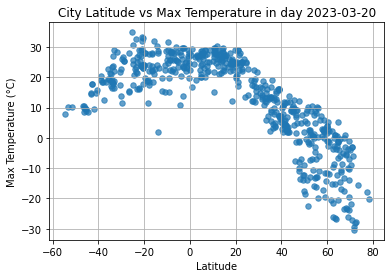

In [8]:
# Build scatter plot for latitude vs. temperature
x_latitude = city_data_df['Lat']
y_max_temp= city_data_df['Max Temp']
plt.scatter(x_latitude, y_max_temp, s=30, alpha=0.7)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f'City Latitude vs Max Temperature in day {today}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

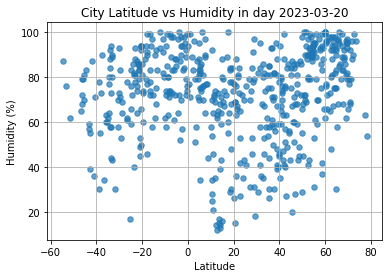

In [9]:
# Build the scatter plots for latitude vs. humidity
x_latitude = city_data_df['Lat']
y_humidity = city_data_df['Humidity']
plt.scatter(x_latitude, y_humidity, s=30, alpha=0.7)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f'City Latitude vs Humidity in day {today}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

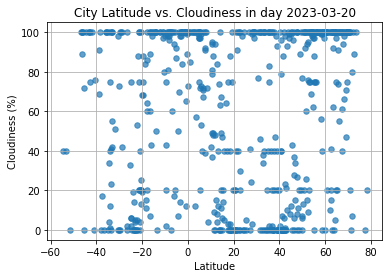

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_latitude = city_data_df['Lat']
y_cloudiness = city_data_df['Cloudiness']
plt.scatter(x_latitude, y_cloudiness, s=30, alpha=0.7)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Cloudiness in day {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

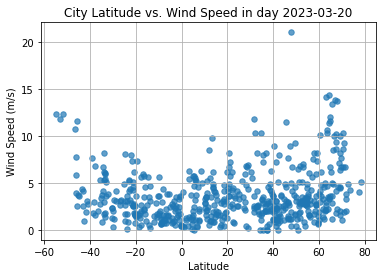

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_latitude = city_data_df['Lat']
y_windspeed = city_data_df['Wind Speed']
plt.scatter(x_latitude, y_windspeed, s=30, alpha=0.7)

# Incorporate the other graph properties
today = datetime.date.today()
plt.title(f"City Latitude vs. Wind Speed in day {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_city_lat = city_data_df['Lat']
y_max_temp = city_data_df['Max Temp']
y_humidity = city_data_df['Humidity']
y_cloudiness = city_data_df['Cloudiness']
y_wind_speed = city_data_df['Wind Speed']

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,4.20,41,0,5.14,US,1679362898
6,manaure,11.7751,-72.4445,26.04,74,48,8.49,CO,1679362901
7,unisan,13.8392,121.9783,25.85,68,0,0.87,PH,1679362902
9,yar-sale,66.8333,70.8333,-5.02,79,100,10.03,RU,1679362694
10,nikolskoye,59.7035,30.7861,3.94,100,100,0.63,RU,1679362903


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,27.09,83,75,5.14,TO,1679362897
2,port alfred,-33.5906,26.8910,17.88,94,41,1.34,ZA,1679362898
3,viedma,-40.8135,-62.9967,15.89,71,76,2.72,AR,1679362899
4,touros,-5.1989,-35.4608,25.00,85,92,2.40,BR,1679362900
5,chuy,-33.6971,-53.4616,18.12,73,0,2.94,UY,1679362900


###  Temperature vs. Latitude Linear Regression Plot

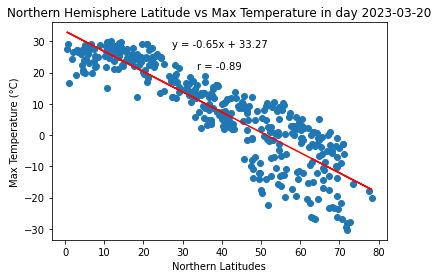

In [15]:
# Linear regression on Northern Hemisphere

# get our data for the plot
x_northern_city_lat = northern_hemi_df['Lat']
y_northern_max_temp = northern_hemi_df['Max Temp']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_northern_city_lat, y_northern_max_temp)
regression_line = slope * x_northern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_northern_city_lat, y_northern_max_temp)
plt.plot(x_northern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Max Temperature in day {today}')
plt.xlabel('Northern Latitudes')
plt.ylabel('Max Temperature (°C)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

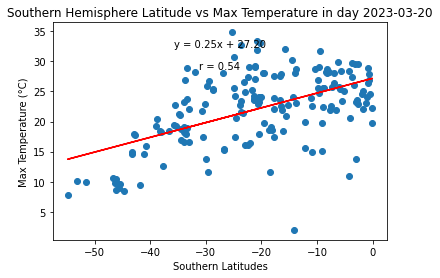

In [16]:
# Linear regression on Southern Hemisphere

# get our data for the plot
x_southern_city_lat = southern_hemi_df['Lat']
y_southern_max_temp = southern_hemi_df['Max Temp']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_southern_city_lat, y_southern_max_temp)
regression_line = slope * x_southern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_southern_city_lat, y_southern_max_temp)
plt.plot(x_southern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Max Temperature in day {today}')
plt.xlabel('Southern Latitudes')
plt.ylabel('Max Temperature (°C)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
- We have negative correlation between x and y for the northern hemisphere, we have positive correlation between x and y for the southern hemisphere.
- Based on the coefficient of determination (R-squared), for the northern hemisphere we have a very strong relationship, for the southern hemisphere we have a strong relationship, this means that our regression line fits the data.
- Data also suggest that tempeture increases when getting closer to the Ecuador.

### Humidity vs. Latitude Linear Regression Plot

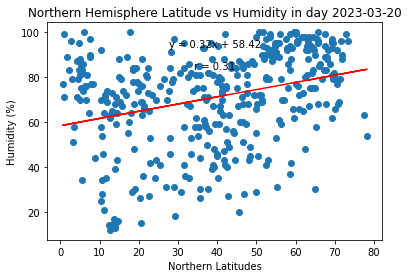

In [17]:
# Northern Hemisphere
# get our data for the plot
x_northern_city_lat = northern_hemi_df['Lat']
y_northern_humidity = northern_hemi_df['Humidity']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_northern_city_lat, y_northern_humidity)
regression_line = slope * x_northern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_northern_city_lat, y_northern_humidity)
plt.plot(x_northern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Humidity in day {today}')
plt.xlabel('Northern Latitudes')
plt.ylabel('Humidity (%)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

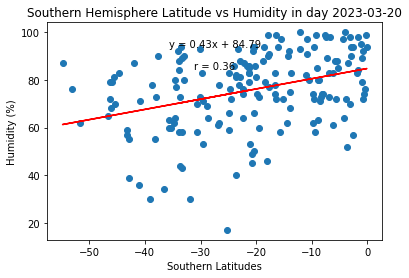

In [18]:
# Southern Hemisphere
# get our data for the plot
x_southern_city_lat = southern_hemi_df['Lat']
y_southern_humidity = southern_hemi_df['Humidity']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_southern_city_lat, y_southern_humidity)
regression_line = slope * x_southern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_southern_city_lat, y_southern_humidity)
plt.plot(x_southern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Humidity in day {today}')
plt.xlabel('Southern Latitudes')
plt.ylabel('Humidity (%)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
- We have positive correlation between x and y for the northern and southern hemisphere.
- Based on the coefficient of determination (R-squared), for the northern and southern hemisphere we have a weak relationship.
- Data also suggest that humidity increases when getting closer to the Ecuador.

### Cloudiness vs. Latitude Linear Regression Plot

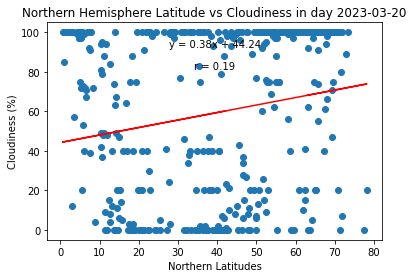

In [19]:
# Northern Hemisphere
x_northern_city_lat = northern_hemi_df['Lat']
y_northern_cloudiness = northern_hemi_df['Cloudiness']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_northern_city_lat, y_northern_cloudiness)
regression_line = slope * x_northern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_northern_city_lat, y_northern_cloudiness)
plt.plot(x_northern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Cloudiness in day {today}')
plt.xlabel('Northern Latitudes')
plt.ylabel('Cloudiness (%)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

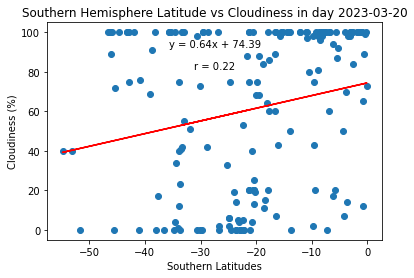

In [20]:
# Southern Hemisphere
# get our data for the plot
x_southern_city_lat = southern_hemi_df['Lat']
y_southern_cloudiness = southern_hemi_df['Cloudiness']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_southern_city_lat, y_southern_cloudiness)
regression_line = slope * x_southern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_southern_city_lat, y_southern_cloudiness)
plt.plot(x_southern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Cloudiness in day {today}')
plt.xlabel('Southern Latitudes')
plt.ylabel('Cloudiness (%)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:**
- We have positive correlation between x and y for the northern and southern hemisphere.
- Based on the coefficient of determination (R-squared), it seems there is no realtionship between x and y for the northern and southern hemisphere.
- Data suggest that cludiness doesn´t increases nor decreases when getting closer to the Ecuador.

### Wind Speed vs. Latitude Linear Regression Plot

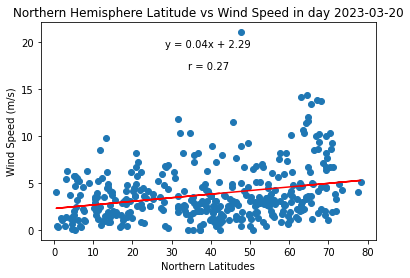

In [21]:
# Northern Hemisphere
x_northern_city_lat = northern_hemi_df['Lat']
y_northern_wind_speed = northern_hemi_df['Wind Speed']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_northern_city_lat, y_northern_wind_speed)
regression_line = slope * x_northern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_northern_city_lat, y_northern_wind_speed)
plt.plot(x_northern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Northern Hemisphere Latitude vs Wind Speed in day {today}')
plt.xlabel('Northern Latitudes')
plt.ylabel('Wind Speed (m/s)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

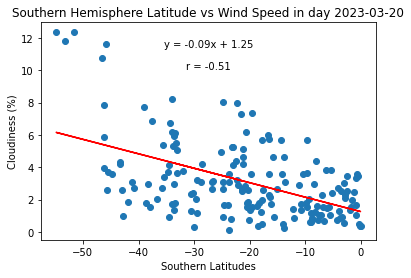

In [23]:
# Southern Hemisphere
# get our data for the plot
x_southern_city_lat = southern_hemi_df['Lat']
y_southern_wind_speed = southern_hemi_df['Wind Speed']


# calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_southern_city_lat, y_southern_wind_speed)
regression_line = slope * x_southern_city_lat + intercept

# Create the scatter plot
plt.scatter(x_southern_city_lat, y_southern_wind_speed)
plt.plot(x_southern_city_lat, regression_line, color='red')

# Incorporate the other plot properties
today = datetime.date.today()
plt.title(f'Southern Hemisphere Latitude vs Wind Speed in day {today}')
plt.xlabel('Southern Latitudes')
plt.ylabel('Cloudiness (%)')


# Add text with regression equation and correlation coefficient
equation = 'y = {:.2f}x + {:.2f}'.format(slope, intercept)
correlation = 'r = {:.2f}'.format(rvalue)
plt.text(0.5, 0.9, equation, ha='center', va='center', transform=plt.gca().transAxes)
plt.text(0.5, 0.8, correlation, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Discussion about the linear relationship:**
- We have positive correlation between x and y for the northern hemisphere, we have negative correlation between x and y for the southern hemisphere.
- Based on the coefficient of determination (R-squared), for the northern hemisphere we have a medium relationship, for the southern hemisphere we have a strong relationship, this means that our regression line fits the data.
- Data doesn´t suggest a correlation between proximity to the Ecuador and Wind Speed.